<a href="https://colab.research.google.com/github/itszoetom/ESGJapan/blob/main/dataseedExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Prepare the Data, Download the dataset and load it into a pandas DataFrame.
file_path = '/content/drive/MyDrive/Colab Notebooks/house.txt'
data = pd.read_csv(file_path, delimiter=';')

<ipython-input-54-a05c3dca1aee>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


In [ ]:
# Clean the data, Handle missing or incorrect entries, Drop rows with missing values
data.dropna(inplace=True)

data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')
data.drop(['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)

data.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [ ]:
data.corr()['Global_active_power']

<ipython-input-56-9359eda5d49a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Global_active_power']


Global_active_power    1.0
Name: Global_active_power, dtype: float64

In [ ]:
#sns.pairplot(data.iloc[:, 0:11], corner = True)

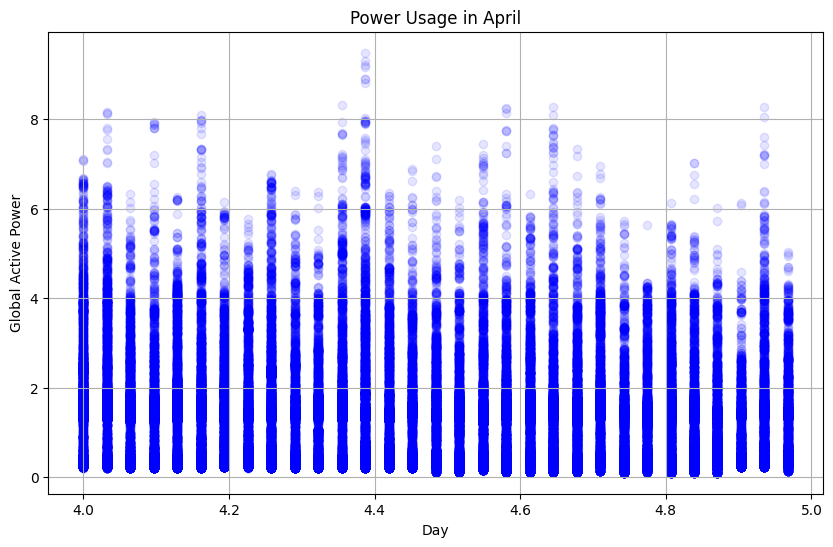

        Date  Global_active_power       MDay  Month  Day
0 2006-12-16                4.216  12.516129     12   16
1 2006-12-16                5.360  12.516129     12   16
2 2006-12-16                5.374  12.516129     12   16
3 2006-12-16                5.388  12.516129     12   16
4 2006-12-16                3.666  12.516129     12   16


In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract month and day separately
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['MDay'] = data['Month'] + data['Day'] / 31

# Filter data for April
april_data = data[(data['MDay'] >= 4.0) & (data['MDay'] < 5.0)]
march_data = data[(data['MDay'] >= 3.0) & (data['MDay'] < 4.0)]
feb_data = data[(data['MDay'] >= 2.0) & (data['MDay'] < 3.0)]
may_data = data[(data['MDay'] >= 5.0) & (data['MDay'] < 6.0)]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(april_data['MDay'], april_data['Global_active_power'], color='blue', alpha=0.1)

# Set labels and title
plt.title('Power Usage in April')
plt.xlabel('Day')
plt.ylabel('Global Active Power')

# Show plot
plt.grid(True)
plt.show()

# Display the first few rows of the modified DataFrame
print(data.head())

In [ ]:
# Concatenate data for February, March, April, and May into one DataFrame
X = pd.concat([feb_data, march_data, april_data, may_data], axis=0)  # Features
y = pd.concat([feb_data['Global_active_power'], march_data['Global_active_power'],
               april_data['Global_active_power'], may_data['Global_active_power']], axis=0)  # Target variable

# Reset indices to ensure consistency
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Now, let's predict next month's global active power
next_month_X = pd.concat([march_data, april_data, may_data], axis=0)
next_month_X.reset_index(drop=True, inplace=True)
next_month_y_pred = model.predict(next_month_X)
predicted_power = next_month_y_pred.mean()
print("Predicted Global Active Power for Next Month:", predicted_power)

# Plot the original data with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X['Month'], y, color='blue', alpha=0.1)
plt.plot(X_test['Month'], y_pred, color='red', linewidth=2)
plt.title('Power Usage per Month with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Average Power Usage')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Mean Squared Error: 0.367780989843728
Root Mean Squared Error: 0.6064494948829028


In [ ]:
X = feb_data, march_data, april_data, may_data  # Features
y = data['Global_active_power']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Now, let's predict next month's global active power
next_month = 'April'  # Assuming data is for consecutive months
predicted_power = model.predict(next_month)
print("Predicted Global Active Power for Next Month:", predicted_power)

# Plot the original data with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Month'], data['Global_active_power'], color='blue', alpha=0.1)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Power Usage per Month with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Average Power Usage')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4, 2049280]

Mean Squared Error: 0.4556778731541322
Predicted Global Active Power for Next Month: [3.42613694]


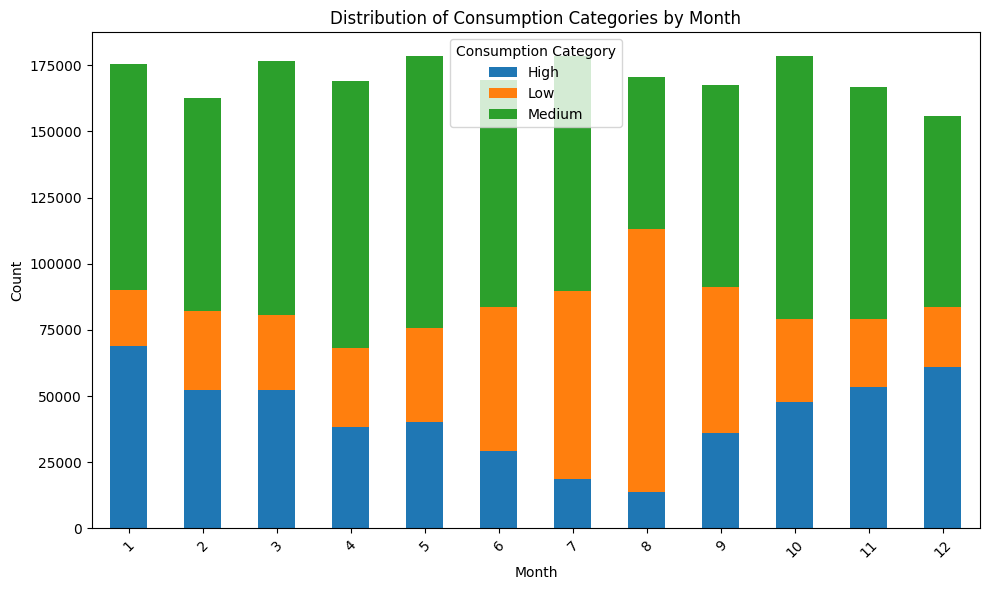

In [ ]:
data['Consumption_Category_Number'] = data['Consumption_Category'].map({'High': 2, 'Medium': 1, 'Low': 0})

#Create a multiple linear regression model
X = data[['Month', 'Consumption_Category_Number']] # Features
y = data['Global_active_power']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Now, let's predict next month's global active power
next_month_category_number = data['Consumption_Category_Number'].max() + 1  # Assuming consecutive numbering
next_month = pd.DataFrame({'Month': [data['Month'].max() + 1],
                           'Consumption_Category_Number': [next_month_category_number]})

predicted_power = model.predict(next_month)
print("Predicted Global Active Power for Next Month:", predicted_power)


# Plotting
monthly_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Consumption Categories by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Consumption Category')
plt.tight_layout()
plt.show()

In [ ]:
from copy import deepcopy

global_active = data['Global_active_power']
data = data.drop(['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Sub_metering_2'], axis=1)
data['Global_active_power'] = global_active
data

,Global_intensity,Sub_metering_1,Sub_metering_3,Global_active_power
0,18.4,0.0,17.0,4.216
1,23.0,0.0,16.0,5.360
2,23.0,0.0,17.0,5.374
3,23.0,0.0,17.0,5.388
4,15.8,0.0,17.0,3.666
...,...,...,...,...
425908,1.6,0.0,0.0,0.392
425909,1.6,0.0,0.0,0.390
425910,1.6,0.0,0.0,0.390
425911,1.6,0.0,0.0,0.394


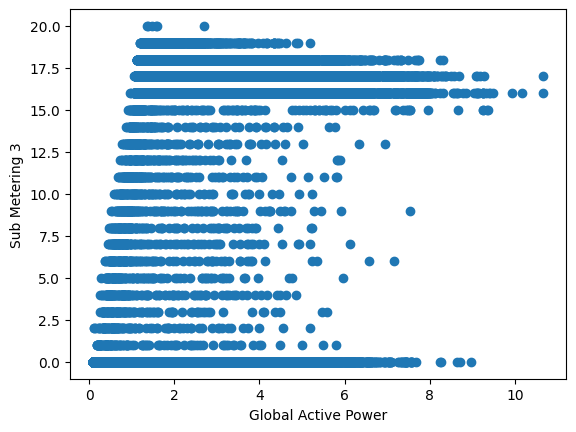

In [ ]:
plt.scatter(data['Global_active_power'], data['Sub_metering_3'])
plt.xlabel('Global Active Power')
plt.ylabel('Sub Metering 3')
plt.show()

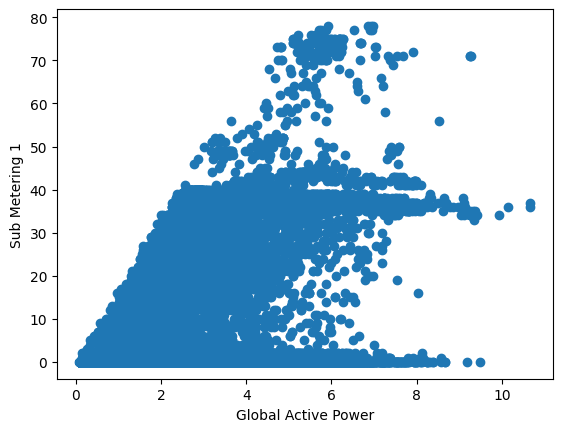

In [ ]:
plt.scatter(data['Global_active_power'], data['Sub_metering_1'])
plt.xlabel('Global Active Power')
plt.ylabel('Sub Metering 1')
plt.show()

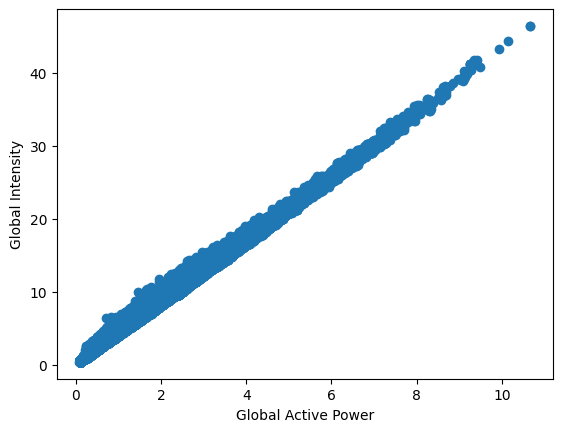

In [ ]:
plt.scatter(data['Global_active_power'], data['Global_intensity'])
plt.xlabel('Global Active Power')
plt.ylabel('Global Intensity')
plt.show()

In [ ]:
data_np = data.to_numpy()
data_np.shape

(421983, 4)

In [ ]:
X_train, y_train = data_np[:, :3], data_np[:, -1]
X_train.shape, y_train.shape

((421983, 3), (421983,))

In [ ]:
X_train

array([[18.4,  0. , 17. ],
       [23. ,  0. , 16. ],
       [23. ,  0. , 17. ],
       ...,
       [ 1.6,  0. ,  0. ],
       [ 1.6,  0. ,  0. ],
       [ 1.6,  0. ,  0. ]])

In [ ]:
sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([4.33714648, 5.41281271, 5.41526684, ..., 0.35794313, 0.35794313,
       0.35794313])

In [ ]:
mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(0.03260768387561858, 0.0025083976843937403)

In [ ]:
predictions_df = pd.DataFrame({'Global Intensity': data["Global_intensity"],
                               'Sub Metering 1': data['Sub_metering_1'],
                               'Sub Metering 3': data['Sub_metering_3'],
                               'Global Active Power': data['Global_active_power'],
                               'Sklearn Global Active Power Predictions': sklearn_y_predictions})
predictions_df

,Global Intensity,Sub Metering 1,Sub Metering 3,Global Active Power,Sklearn Global Active Power Predictions
0,18.4,0.0,17.0,4.216,4.337146
1,23.0,0.0,16.0,5.360,5.412813
2,23.0,0.0,17.0,5.374,5.415267
3,23.0,0.0,17.0,5.388,5.415267
4,15.8,0.0,17.0,3.666,3.727774
...,...,...,...,...,...
425908,1.6,0.0,0.0,0.392,0.357943
425909,1.6,0.0,0.0,0.390,0.357943
425910,1.6,0.0,0.0,0.390,0.357943
425911,1.6,0.0,0.0,0.394,0.357943


In [ ]:
with the predictions column, figure out how to get coef_ and intercept and just use that
formula to calculate the next months (gotta get it on time order)

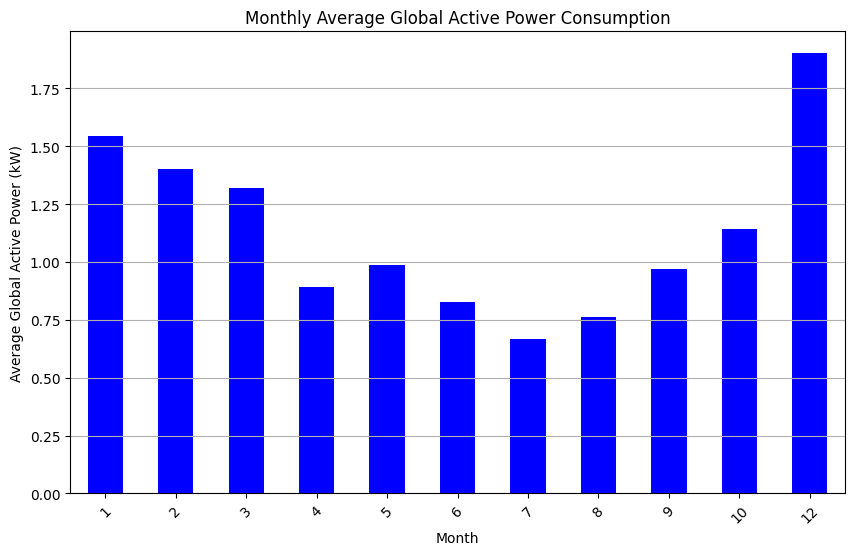

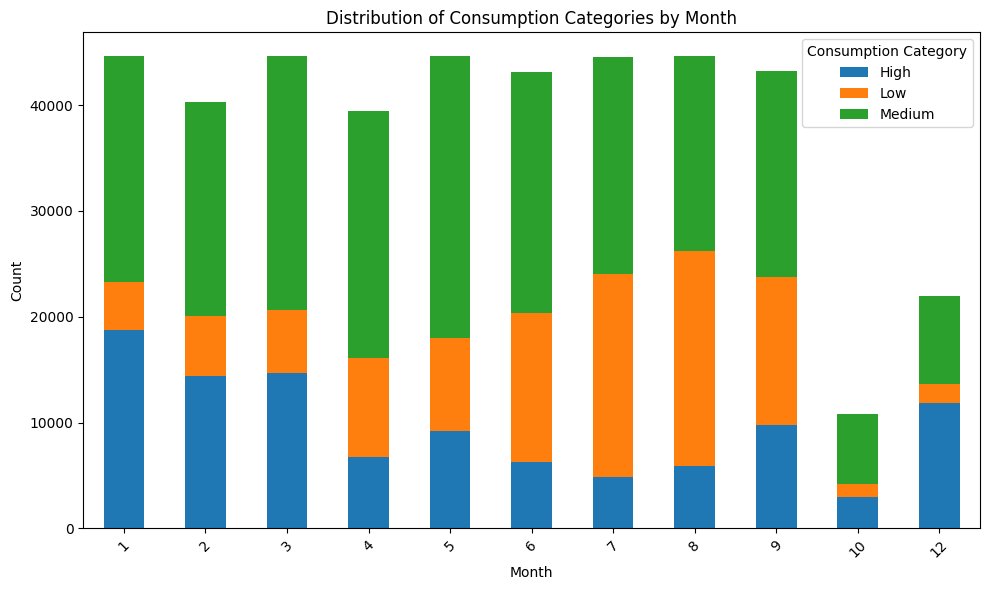

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Hour,Consumption_Category
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,17,High
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,17,High
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,17,High
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,17,High
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,17,High


In [ ]:
# Predict Future Consumption

# Feature selection
X = data[['Global_intensity', 'Sub_metering_1']]
y = data['Global_active_power']

mlr = LinearRegression()
mlr = mlr.fit(X, y)

def rmse(actual, predicted):
  return np.sqrt(np.mean((actual - predicted) ** 2))

mlr_preds = mlr.predict(data[['Global_intensity', 'Sub_metering_1']])

print(mlr.coef_)
print(mlr.intercept_)


[ 0.2372509  -0.00110853]
-0.016110455949929436


In [ ]:
mses = np.empty(0)

beta1s = np.arange(-1, 1, 0.05)
beta2s = np.arange(-1, 1, 0.05)

for i in beta1s:
  for j in beta2s:

    preds = mlr.intercept_ + i*data["Global_intensity"] + j*data["Sub_metering_1"]

    error = data["Global_active_power"] - preds

    mses = np.append(mses, np.mean(error**2))

In [ ]:
b1, b2 = np.meshgrid(beta1s, beta2s)

In [ ]:
loss = np.reshape(mses, b1.shape)

In [ ]:
import plotly.graph_objects as go

loss_surface = go.Surface(x=b1, y=b2, z=loss)

optimal_point = go.Scatter3d(name = 'Optimal Point',
      x = np.array(mlr.coef_[1]), y = np.array(mlr.coef_[0]),
      z = np.array(np.min(mses)),
      marker = dict(size=10, color='red'))

fig = go.Figure(data=[loss_surface, optimal_point])
fig.update_layout(scene=dict(
    xaxis_title = 'beta1',
    yaxis_title = 'beta2',
    zaxis_title = 'MSE'))
fig.show()

<ipython-input-62-9359eda5d49a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Global_active_power      1.000000
Global_reactive_power    0.264441
Voltage                 -0.324843
Global_intensity         0.998951
Sub_metering_1           0.469521
Sub_metering_2           0.463405
Sub_metering_3           0.617457
Month                   -0.079624
Hour                     0.271347
Name: Global_active_power, dtype: float64